In [156]:
import os

In [157]:
os.getcwd()

'C:\\Users\\Lenovo'

In [158]:
root=r'C:\Users\Lenovo\Desktop\train_folder\train'
train_im=os.listdir(root)

In [159]:
import matplotlib.pyplot as plt
from PIL import Image

In [160]:
import numpy as np
new_im=Image.open(os.path.join(root,train_im[np.random.choice(len(train_im))]))

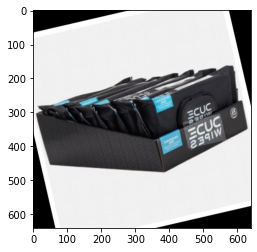

In [161]:
fig,ax=plt.subplots()
ax.imshow(new_im)
plt.show()

In [162]:
os.path.exists(r"C:\Users\Lenovo\Desktop\train_folder\_annotations.coco.json")

True

In [164]:
import json
from collections import defaultdict
image_ids_annotations = defaultdict(list)
file=open(r"C:\Users\Lenovo\Desktop\train_folder\_annotations.coco.json",'r+')
anns=json.loads(file.read())
for ann in anns['annotations']:
    image_id = ann['image_id'] # Are integers
    image_ids_annotations[image_id].append(ann)
print(image_ids_annotations[0])

[{'id': 0, 'image_id': 0, 'category_id': 8, 'bbox': [0, 36, 640, 545], 'area': 348800, 'segmentation': [], 'iscrowd': 0}]


In [100]:
category_id_annots=defaultdict(list)
for ann in anns['categories']:
    category_id_annots[ann['id']]=ann['name']
print(category_id_annots)

defaultdict(<class 'list'>, {0: 'fight', 1: 'AXA', 2: 'Adidas', 3: 'Animoca Brands', 4: 'Betfred', 5: 'Cadbury', 6: 'Canon', 7: 'Carlsberg', 8: 'Casillero de Diablo', 9: 'Chevrolet', 10: 'Chivas', 11: 'DHL', 12: 'Dude Wipes', 13: 'Ecolab', 14: 'Etihad Airways', 15: 'Expedia', 16: 'Kohler', 17: 'Laybuy', 18: 'Marriot', 19: 'Maui Jim', 20: 'Melitta', 21: 'Mlily', 22: 'Nestle', 23: 'Nike', 24: 'Snapdragon', 25: 'Standard Chartered', 26: 'TeamViewer', 27: 'Therabody.', 28: 'Therabody_', 29: 'Visit Malta', 30: 'Wasabi'})


In [121]:
print(anns['images'][48])

{'id': 48, 'license': 1, 'file_name': '_105468347_gettyimages-94471352_jpg.rf.035921ae4e50d6c09c6b286b6123c1ce.jpg', 'height': 640, 'width': 640, 'date_captured': '2022-10-15T10:06:40+00:00'}


In [127]:
count=0
for i in range(len(train_im)):   
    annot_im=anns['images'][i]['file_name']
    annot_im_disp=os.path.join(root,annot_im)
    if os.path.exists(annot_im_disp):
        count+=1
print(count)

3540


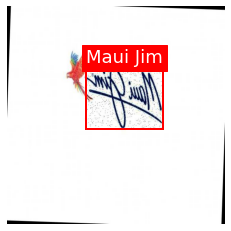

In [205]:
image_id=np.random.choice(len(train_im))
annot_im=anns['images'][image_id]['file_name']
fig,ax=plt.subplots()
import matplotlib.patches as patch
if annot_im in os.listdir(root):
    image_anns = image_ids_annotations[image_id]
    for i in image_anns:
        bound=i['bbox']
        category=category_id_annots[i['category_id']]
        x=float(bound[0])
        y=float(bound[1])
        w=float(bound[2])
        h=float(bound[3])
        plt.text(x+1, y-5, category,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'red'})
        bb = patch.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(bb)
    ax.axis('off')
    ax.imshow(Image.open(os.path.join(root,annot_im)))
    plt.show()
else:
    print('file not found')